### Calculating & Investigating final number density plot

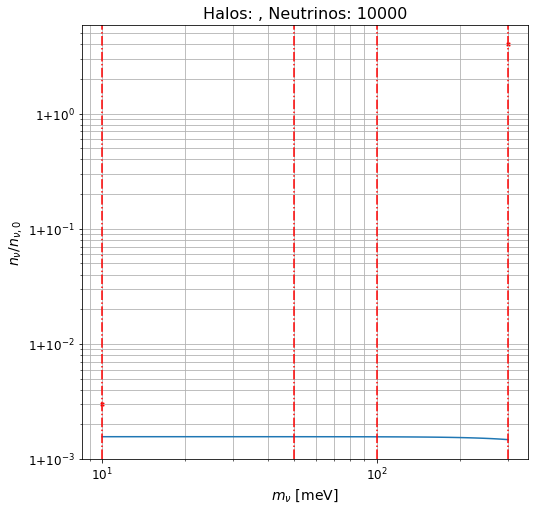

Max value: 1.0015660921620877 0.0015660921620876955


In [1]:
from shared.preface import *
import shared.functions as fct


# Load data.
nus = 10000
MW_HALO = False
AG_HALO = False
VC_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
u_all = fct.load_u_sim(nus, halos)

def number_density_1_mass(m_nu_eV, average=False):

    n_nus = np.zeros(len(m_nu_eV))
    for i, m_eV in enumerate(m_nu_eV):

        # Get momenta.
        p, _ = fct.u_to_p_eV(u_all, m_eV)

        if average and m_eV >= 0.1:
            # Calculate number density, values are averaged for z in [3.5, 4].
            idx = np.array(np.where(ZEDS >= 3.5)).flatten()

            temp = np.zeros(len(idx))
            for j,k in enumerate(idx):
                val = fct.number_density(p[:,0], p[:,k])
                temp[j] = val

            n_nus[i] = np.mean(temp)

        else:
            n_nus[i] = fct.number_density(p[:,0], p[:,-1])

    np.save(
        f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy', 
        n_nus
        )


# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 100)*eV

number_density_1_mass(mass_range_eV, average=False)
n_nus = np.load(
    f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy'
    )/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.scatter(x_ends, y_ends, s=12, marker='x', c='r')

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Halos: {halos}, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 1e-1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_halos_{halos}.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))

### Visualizing the neutrino trajectories.

In [ ]:
from shared.preface import *
import shared.functions as fct

# Positions of all neutrinos.
nus = 1000
MW_HALO = False
VC_HALO = False
AG_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
x_all = fct.load_x_sim(nus, halos)/1e3

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(nus):

    # Positions of 1 neutrino.
    x_nu1 = x_all[i,:]
    x, y, z = x_nu1[:,0], x_nu1[:,1], x_nu1[:,2]

    if i==0:
        print(x[0])

    ax.plot3D(x, y, z, alpha=0.01)



# ax.scatter3D(
#     X_VC[0]/1e3, X_VC[1]/1e3, X_VC[2]/1e3, s=300, c='r', label='Virgo Cluster'
#     )

# ax.scatter3D(
#     X_AG[0]/1e3, X_AG[1]/1e3, X_AG[2]/1e3, s=200, c='b', label='M31'
#     )

ax.scatter3D(
    0.,0.,0., s=10, c='k', label='Galactic Center'
    )


ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,20)

ax.set_xlabel('x-axis (Mpc)')
ax.set_ylabel('y-axis (Mpc)')
ax.set_zlabel('z-axis (Mpc)')

plt.legend()
plt.show()